# Chapter 4 Forward Uncertainty Quantification via Polynomial Chaos Expansion

In [ ]:
using Plots, LaTeXStrings, Distributions, KernelDensity

# Figure 4.1
## One-dimensional uncertainty propagation example
Assembling of the plots is done in Inkskape
#### Plot for the function

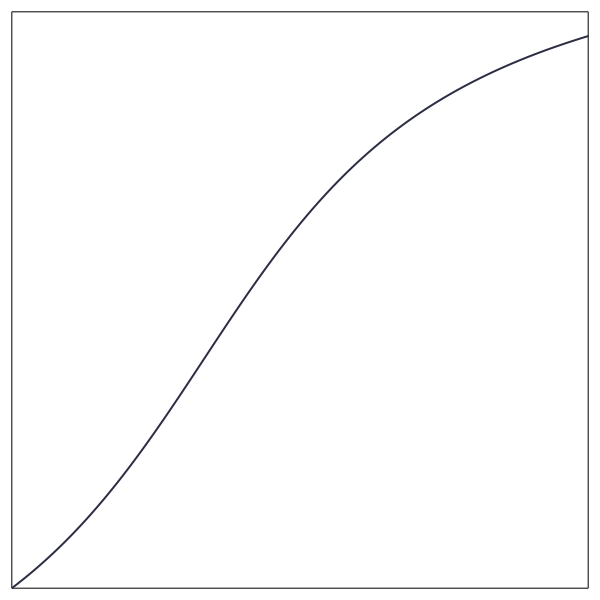

In [39]:
# red colorant"#d90429"
# blue colorant"#2b2d42"
x = collect(-1:0.01:2.5)
f(x) = atan.(x)

# limits for plot
x_lower, x_upper = -π/2+0.3, π/2-0.3
y_lower, y_upper = minimum(f(x)), maximum(f(x))
x_lower, x_upper = -1, 2
y_lower, y_upper = minimum(f(x)), maximum(f(x))

# plot the function 
p1 = plot(x, f(x); label=:none, framestyle=:box, grid=:none, lw=2, lc=colorant"#2b2d42", size=(600,600),
                     xlim=(x_lower, x_upper),ylim=(y_lower, y_upper),ticks=:none)
plot(p1)

#### Plot the uncertain input distribution
$X \sim \mathcal{N}(0.5, 0.45)$

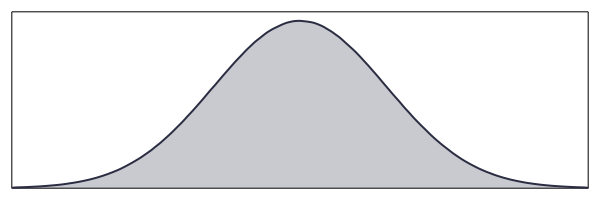

In [67]:
# truncated normal distribution
# X = rand.(Distributions.truncated(Normal(0.5,0.45), x_lower, x_upper), 50000000);
# X_kde = KernelDensity.kde(X)

p2 = plot(X_kde.x, X_kde.density; grid=:none, label=:none, framestyle=:box,
          lw=2, lc=colorant"#2b2d42", xlim=(x_lower, x_upper), size=(600,200))
p2 = plot!(collect(X_kde.x), zeros(length(collect(X_kde.x))),fillrange=collect(X_kde.density),fillcolor=colorant"#2b2d42",
     fillalpha=0.25,linealpha=0.0,legend=:none, 
    ylim=(0,0.935),
    ticks=:none)
plot(p2)

#### Plot the uncertainty in the model response

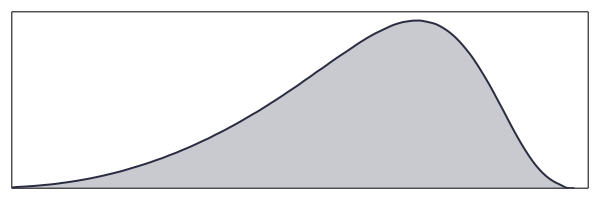

In [68]:
# Y = f(X)
# Y_kde = KernelDensity.kde(Y)
p3 = plot(Y_kde.x, Y_kde.density; label=:none, framestyle=:box, grid=:none,
          lw=2, lc=colorant"#2b2d42", xlim=(y_lower, y_upper), size=(600,200))
p3 = plot!(collect(Y_kde.x), zeros(length(collect(Y_kde.x))),fillrange=collect(Y_kde.density),fillcolor=colorant"#2b2d42",
     fillalpha=0.25,linealpha=0.0,legend=:none,ticks=:none,
    ylim=(0,1.26)
)
plot(p3)

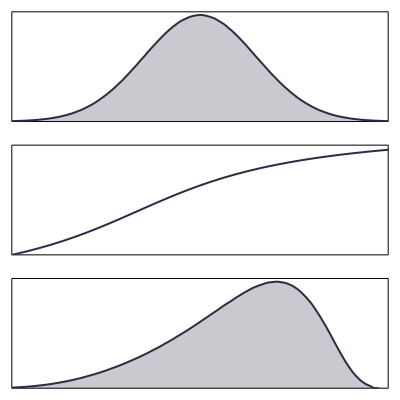

In [59]:
l = @layout [a;b;c]
plot(p2,p1,p3,layout=l, size=(400,400))

In [257]:
# export calligraphic G is .svg
p4 = plot(xlim=(-1,1),ylim=(-1,1),framestyle=:none)
p4 = annotate!(1,0.93, text(L"\mathcal{G}", :black, 22))

In [259]:
# export calligraphic G is .svg
p5 = plot(xlim=(-1,1),ylim=(-1,1),framestyle=:none)
p5 = annotate!(1,0.93, text(L"\hat{\mathcal{G}}", :black, 22))